In [1]:
import numpy as np
from matplotlib.pyplot import * 
from math import sqrt, pi,cos,log
import numba
import scipy.signal
from statsmodels.graphics.tsaplots import plot_acf
from scipy.optimize import curve_fit

/home/carmen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
@numba.jit(nopython=True)
def colored_noise_euler_integration(x_0, tau, c, D, dt=0.001, t_stop=101):
    """
    Use Euler integration to solve ODEs
    """    
    mu=np.exp(-dt/tau)
    sigma= sqrt( ((c * tau)/2) * (1-mu**2) )
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        x[i+1] = x[i]* mu + sigma * np.random.normal()
        
    return t, x

In [3]:
#@numba.jit(nopython=True)
def colored_noise_euler_integration_fox(x_0, lamda, D, dt=0.001, t_stop=101):
    """
    Use Euler integration to solve ODEs
    """    
    E=np.exp(-lamda * dt)
    
    # Time points
    t = np.linspace(0, t_stop, int(t_stop/dt))
    
    # Initialize output array
    x = x_0 * np.ones_like(t)
    
    for i in range(0, len(t) - 1):
        a=np.random.uniform()
        b=np.random.uniform()
        x[i+1] = x[i]* E + sqrt(-2*D*lamda*(1-E**2)*np.log(a))*cos(2*pi*b)
        
    return t, x

In [51]:
# Specify parameters
x_0 = 0
tau =10
c=0.01
dt=0.001
D=10
lamda=0.003
t_stop=10000
indexes=[int(t/dt) for t in range(0,t_stop)]

In [15]:
##GILLESPIE

In [16]:
print(np.exp(1))

2.71828182846


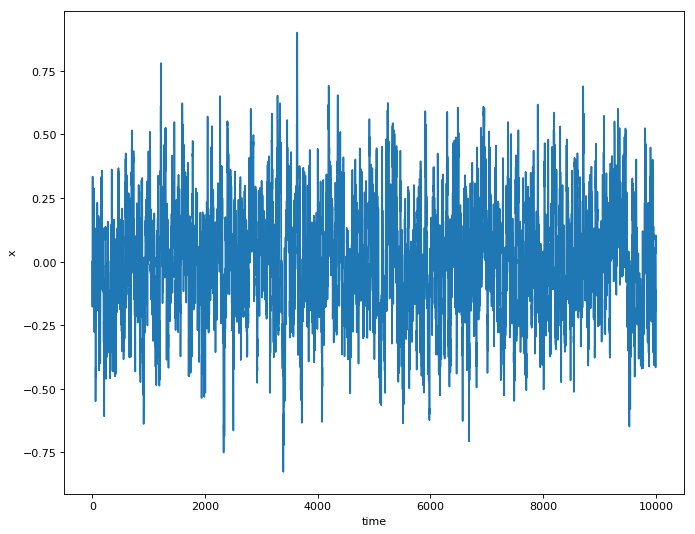

In [52]:
# Perform the solution
t, x = colored_noise_euler_integration(x_0, tau, c, D, dt, t_stop)

# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t[indexes], x[indexes])
xlabel('time')
ylabel('x')
show()

In [176]:
##FOX

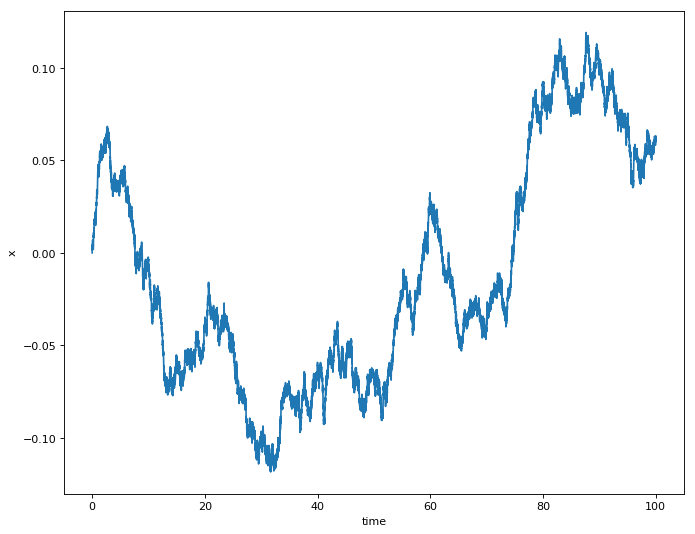

In [177]:
# Perform the solution
t, x = colored_noise_euler_integration_fox(x_0, lamda,D, dt, t_stop)

# Plot the result
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plot(t, x)
xlabel('time')
ylabel('x')
show()

In [ ]:
## AUTOCORRELATION

In [20]:
def autocorrelation(x):
    result = np.correlate(x, x, mode='full')
    result=result[int(result.size/2):]
    return result/result[0]

In [21]:
from scipy.stats import linregress

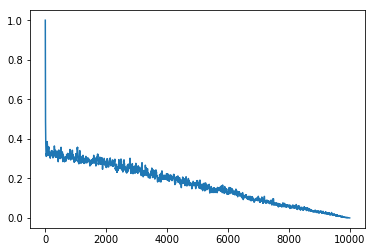

In [54]:
#1
autocorr=autocorrelation(x[indexes]**2)
a=autocorr
a.shape
plot(a)
show()

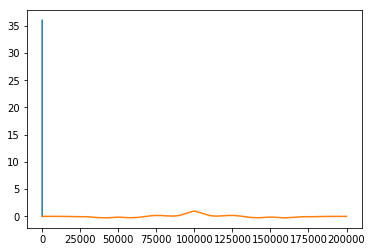

In [30]:
#2
y = x - np.mean(x)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
plot(correlated)
show()

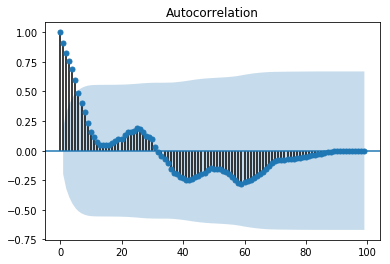

In [19]:
#3
plot_acf(x[indexes])
show()

In [44]:
#4
iact=[]
timeseries = x
mean = np.mean(timeseries)
timeseries -= np.mean(timeseries)
autocorr_f = np.correlate(timeseries, timeseries, mode='full')
temp = autocorr_f[int(autocorr_f.size/2):]/autocorr_f[int(autocorr_f.size/2)]
iact.append(sum(autocorr_f[int(autocorr_f.size/2):]/autocorr_f[int(autocorr_f.size/2)]))

In [ ]:
##EXPONTENTIAL FITTING

In [44]:
def func(x, a, b, c):
    return a * np.exp(-1/b * x) + c

In [45]:
def exponential_fitting(autocorr,t):
    ydata=autocorr
    xdata=np.arange(autocorr.shape[0])
    popt, pcov = curve_fit(func, xdata, ydata)
    plot(xdata, ydata, 'b-', label='data')
    plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    xlabel('n')
    ylabel('MImax')
    legend()
    show()
    return popt

In [30]:
t[:a.shape[0]]

array([ 0.        ,  0.001     ,  0.002     ,  0.003     ,  0.004     ,
        0.00500001])

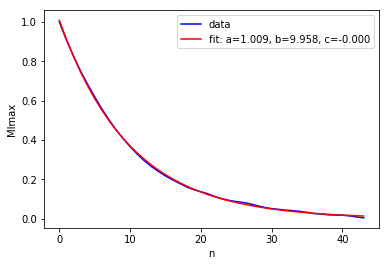

array([  1.00908100e+00,   9.95767502e+00,  -2.60971580e-04])

In [46]:
exponential_fitting(a,t)

In [43]:
1/1.00425049e-01

9.95767500198083

tau= 1


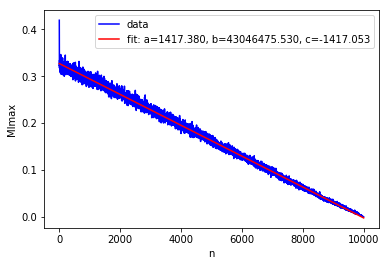

tau= 2


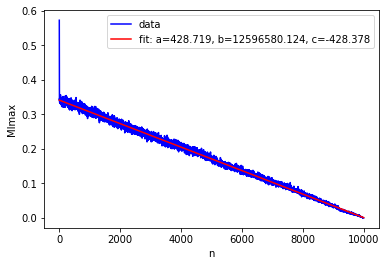

tau= 3


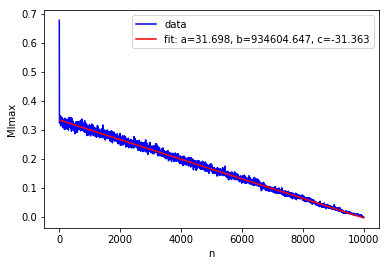

tau= 4


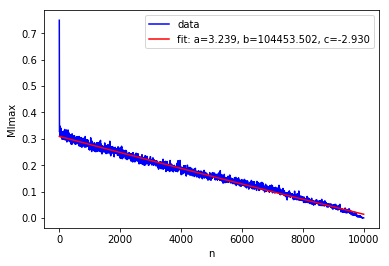

tau= 5


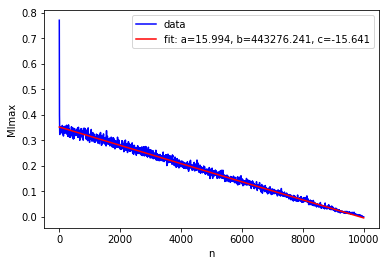

tau= 6


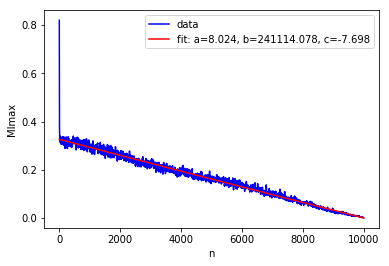

tau= 7


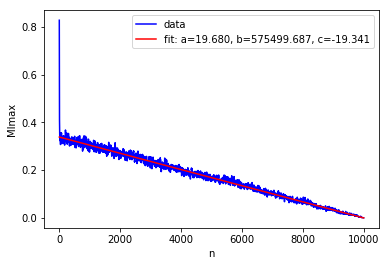

tau= 8


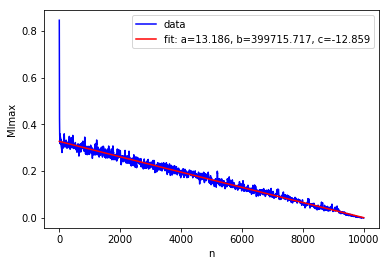

tau= 9


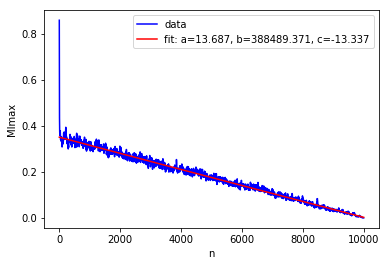

In [56]:
t_stop=10000
indexes=[int(t/dt) for t in range(0,t_stop)]
c=0.01
for tau in range(1,10):
    print("tau=",tau)
    t, x = colored_noise_euler_integration(x_0, tau, c, D, dt, t_stop)
    autocorr=autocorrelation(x[indexes]**2)
    #a=autocorr[:np.argmax(autocorr<0)]
    exponential_fitting(autocorr[1:],t)

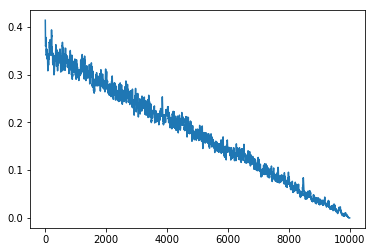

In [66]:
plot(autocorr[9:])
show()

In [75]:
def line(x,a,b):
    return a*x+b

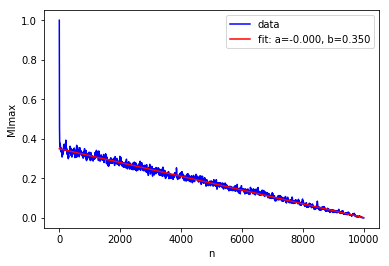

In [78]:
ydata=autocorr
xdata=np.arange(autocorr.shape[0])
popt, pcov = curve_fit(line, xdata, ydata)
plot(xdata, ydata, 'b-', label='data')
plot(xdata, line(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
xlabel('n')
ylabel('MImax')
legend()
show()

In [77]:
popt

array([ -3.46612752e-05,   3.48552081e-01])